# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
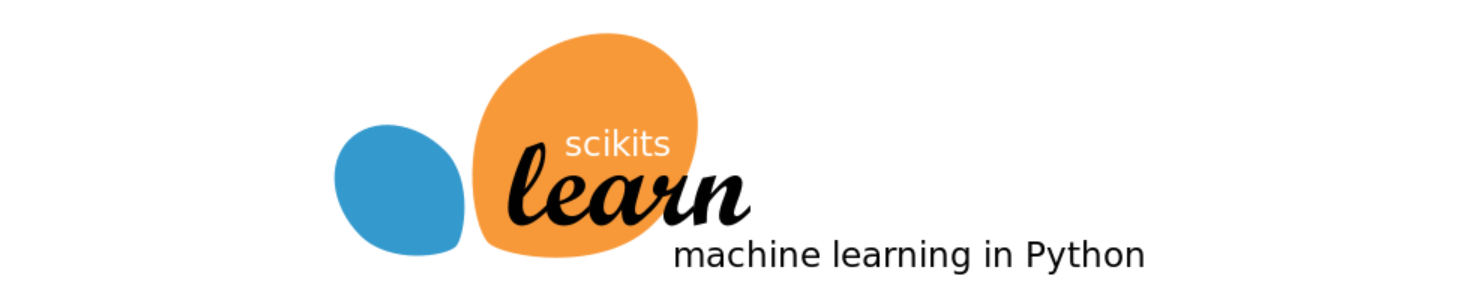

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/lhashing/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(404, 13)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
model.score(X_train,y_train)

0.7461139242409127

In [8]:
model.score(X_test,y_test)

0.7029486886826131

In [9]:
model.intercept_

41.559531494159216

In [10]:
model.coef_

array([-1.20509959e-01,  5.22652136e-02,  3.87428723e-02,  3.32664749e+00,
       -1.94129873e+01,  3.47986505e+00,  5.01706237e-03, -1.65129974e+00,
        3.25058823e-01, -1.23353973e-02, -1.02419374e+00,  8.78797393e-03,
       -5.79710918e-01])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [12]:
modelp = LinearRegression()
modelp.fit(X_train_poly,y_train)

LinearRegression()

In [13]:
modelp.score(X_train_poly,y_train)

0.878415662464908

In [14]:
modelp.score(X_test_poly,y_test)

0.7236927895392529

# 5. Ridge Regularization for Linear Model

In [15]:
from sklearn.linear_model import Ridge

modelr = Ridge(alpha=10000)
modelr.fit(X_train_poly,y_train)

Ridge(alpha=10000)

In [16]:
modelr.score(X_train_poly,y_train)

0.8918411081798202

In [17]:
modelr.score(X_test_poly,y_test)

0.8024314889835409

# 6. Lasso Regularization for Linear Model

In [18]:
from sklearn.linear_model import Lasso

modelL = Lasso(alpha=0.00001)
modelL.fit(X_train_poly,y_train)

/home/lhashing/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+03, tolerance: 3.502e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-05)

In [19]:
modelL.score(X_train_poly,y_train)

0.9291021382926499

In [20]:
modelL.score(X_test_poly,y_test)

0.7867935337171905

# 7. Polynomial Regression of degree 2

In [21]:
 from sklearn.preprocessing import PolynomialFeatures
modelpf = PolynomialFeatures(degree = 2)
x_train_poly = modelpf.fit_transform(X_train)
x_train_poly

array([[1.00000000e+00, 1.74460000e-01, 0.00000000e+00, ...,
        1.54645562e+05, 6.79142750e+03, 2.98252900e+02],
       [1.00000000e+00, 1.11320000e-01, 0.00000000e+00, ...,
        1.57529610e+05, 5.29861500e+03, 1.78222500e+02],
       [1.00000000e+00, 1.44208000e+01, 0.00000000e+00, ...,
        7.55700100e+02, 4.96194500e+02, 3.25802500e+02],
       ...,
       [1.00000000e+00, 1.26500000e-01, 2.50000000e+01, ...,
        1.56483536e+05, 3.75801000e+03, 9.02500000e+01],
       [1.00000000e+00, 2.15505000e+00, 0.00000000e+00, ...,
        2.86523329e+04, 2.81834550e+03, 2.77222500e+02],
       [1.00000000e+00, 1.80846000e+01, 0.00000000e+00, ...,
        7.42562500e+02, 7.91612500e+02, 8.43902500e+02]])

In [22]:
x_test_poly = modelpf.fit_transform(X_test)
x_test_poly

array([[1.00000000e+00, 1.95390000e-01, 0.00000000e+00, ...,
        1.42257209e+05, 2.84386180e+03, 5.68516000e+01],
       [1.00000000e+00, 1.34284000e+00, 0.00000000e+00, ...,
        1.25238132e+05, 2.27551270e+03, 4.13449000e+01],
       [1.00000000e+00, 2.41030000e-01, 0.00000000e+00, ...,
        1.57529610e+05, 5.07635100e+03, 1.63584100e+02],
       ...,
       [1.00000000e+00, 7.72990000e-01, 0.00000000e+00, ...,
        1.50497444e+05, 4.96563200e+03, 1.63840000e+02],
       [1.00000000e+00, 9.29900000e-02, 0.00000000e+00, ...,
        1.42952048e+05, 6.77915370e+03, 3.21484900e+02],
       [1.00000000e+00, 6.16200000e-02, 0.00000000e+00, ...,
        1.32940452e+05, 4.61960870e+03, 1.60528900e+02]])

In [23]:
modellrpf = LinearRegression()
modellrpf.fit(x_train_poly, y_train)
modellrpf.score(x_train_poly, y_train)

0.878415662464908

In [24]:
modellrpf.score(x_test_poly, y_test)

0.7236927895392529

# 8. Ridge Regularization for Polynomial model

In [25]:
from sklearn.linear_model import Ridge, Lasso
modelrpf = Ridge(alpha = 0)
modelrpf.fit(x_train_poly, y_train)
modelrpf.score(x_train_poly, y_train)

0.9435197664194321

In [26]:
modelrpf.score(x_test_poly, y_test)

0.7796879859557455

# 9. Lasso Regularization for Polynomial model

In [27]:
modellpf = Lasso(alpha = 0)
modellpf.fit(x_train_poly, y_train)
modellpf.score(x_train_poly, y_train)

/tmp/ipykernel_7715/474514054.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  modellpf.fit(x_train_poly, y_train)
/home/lhashing/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/lhashing/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.241e+03, tolerance: 3.502e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.9291023539320565

In [28]:
modellpf.score(x_test_poly, y_test)

0.7867845799604871

# 10. Select K Best

In [29]:
## Impleating feature selection using SelectKBest Class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
kb = SelectKBest(score_func=f_regression,k=12)

#apply feature selection
X_selected = kb.fit_transform(X,y)
X_selected.shape

(506, 12)

In [30]:
X.shape

(506, 13)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,random_state=10)
X_train.shape

(379, 12)

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
lr.score(X_train,y_train)

0.756478280935217

In [34]:
lr.score(X_test,y_test)

0.664515553168864

### Feature Selection - Pearson's Correlation Coefficient

In [35]:
df = pd.DataFrame(data=X,columns=boston.feature_names)
df['y'] = y
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     y  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [36]:
corr = df.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
y       -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT         y  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
y        0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

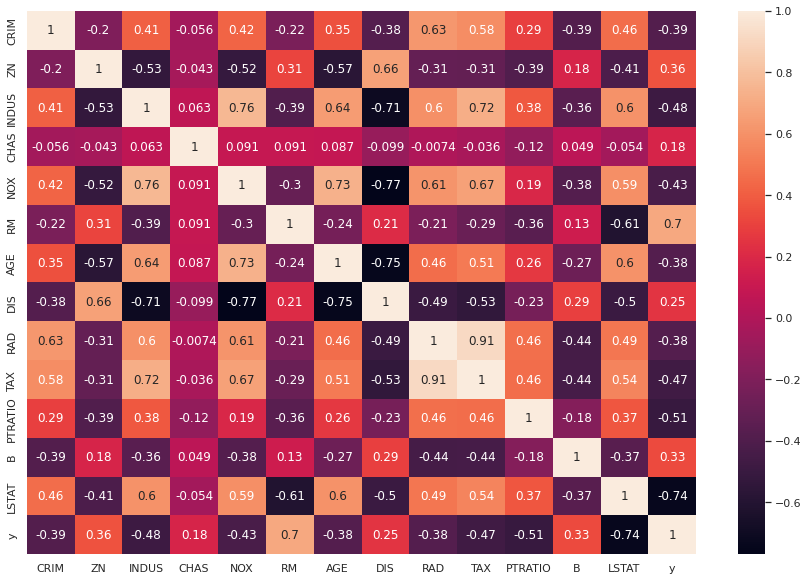

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [38]:
columns = ['RM','LSTAT','PTRATIO','INDUS','TAX','NOX','CRIM']

In [39]:
sdf = df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    TAX    NOX     CRIM
0  6.575   4.98     15.3   2.31  296.0  0.538  0.00632
1  6.421   9.14     17.8   7.07  242.0  0.469  0.02731
2  7.185   4.03     17.8   7.07  242.0  0.469  0.02729
3  6.998   2.94     18.7   2.18  222.0  0.458  0.03237
4  7.147   5.33     18.7   2.18  222.0  0.458  0.06905

# 11. Conclusion

### Regularization improves the accuracy of the model and it helps to improve overfitting and underfitting model.
### Select K best improves the accuracy of the model by reducing the number of training data.
### Select K best visualize how our training datas are related to each other and it also minimizes overfitting and underfitting model.